In [2]:
#Regression

In [15]:
from sklearn.datasets import make_regression

In [ ]:
data = make_regression(n_samples=1000, n_features=5, noise=0.2, random_state=42)

In [17]:
X= data[0]

In [18]:
y = data[1]

In [19]:
X[0]

array([ 2.05654356,  0.60685059,  0.48268789, -1.13088844,  0.42009449])

In [20]:
y[0]

np.float64(74.8638525346159)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()

In [23]:
X = scaler.fit_transform(X)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [39]:
X_train.shape

(800, 5)

In [40]:
y_train.shape

(800,)

In [28]:
import keras

In [29]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(5,)))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=16, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='linear'))

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 385 (1.50 KB)

 Trainable params: 385 (1.50 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
los = keras.losses.MeanSquaredError()
opt = keras.optimizers.Adam()
model.compile(loss=los, optimizer = opt)

In [37]:
model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=50, verbose=2)

Epoch 1/100
15/15 - 0s - 4ms/step - loss: 35.6926 - val_loss: 45.2719
Epoch 2/100
15/15 - 0s - 2ms/step - loss: 34.9222 - val_loss: 44.7708
Epoch 3/100
15/15 - 0s - 2ms/step - loss: 34.4869 - val_loss: 44.3642
Epoch 4/100
15/15 - 0s - 2ms/step - loss: 34.0842 - val_loss: 43.7257
Epoch 5/100
15/15 - 0s - 2ms/step - loss: 33.6064 - val_loss: 42.4012
Epoch 6/100
15/15 - 0s - 2ms/step - loss: 33.0969 - val_loss: 42.0005
Epoch 7/100
15/15 - 0s - 2ms/step - loss: 32.6428 - val_loss: 41.4353
Epoch 8/100
15/15 - 0s - 2ms/step - loss: 32.0676 - val_loss: 41.4170
Epoch 9/100
15/15 - 0s - 2ms/step - loss: 31.6353 - val_loss: 40.4353
Epoch 10/100
15/15 - 0s - 2ms/step - loss: 31.1248 - val_loss: 39.6799
Epoch 11/100
15/15 - 0s - 2ms/step - loss: 30.6753 - val_loss: 39.3444
Epoch 12/100
15/15 - 0s - 2ms/step - loss: 30.2128 - val_loss: 38.7487
Epoch 13/100
15/15 - 0s - 2ms/step - loss: 29.7337 - val_loss: 37.7903
Epoch 14/100
15/15 - 0s - 2ms/step - loss: 29.3670 - val_loss: 37.1539
Epoch 15/100
15

In [41]:
model.evaluate(X_train, y_train)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - loss: 3.1902


3.1901779174804688

In [42]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7960 


3.7960267066955566

In [43]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [44]:
y_pred.shape

(200, 1)

In [45]:
y_test.shape

(200,)

In [47]:
import matplotlib.pyplot as plt

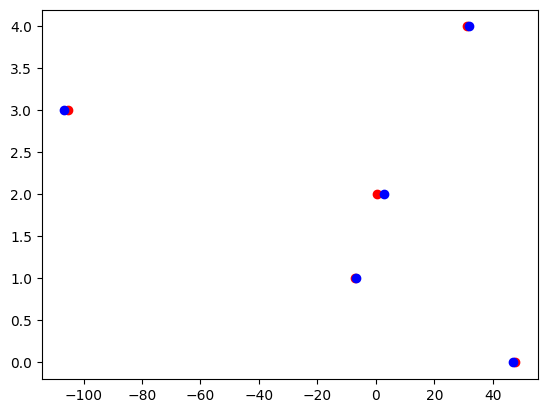

In [53]:
plt.scatter(y_pred[:5], range(5), color='red')
plt.scatter(y_test[:5], range(5), color='blue')
plt.show()